In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import permutation_test
from statsmodels.stats.power import TTestIndPower

# Tworzenie danych

In [3]:
pfizer = np.ones(21500)
pfizer[:9] = 0

moderna = np.ones(15000)
moderna[:5] = 0


# Średnia skuteczność

In [5]:
pfizer_mean= np.mean(pfizer)

print('Pfizer mean: ', pfizer_mean)

moderna_mean = np.mean(moderna)

print('Moderna mean: ', moderna_mean)

Pfizer mean:  0.9995813953488372
Moderna mean:  0.9996666666666667


# Odchylenie standardowe

In [6]:
pfizer_std = np.std(pfizer)

print('Pfizer std: ', pfizer_std)

moderna_std = np.std(moderna)

print('Moderna std: ', moderna_std)

Pfizer std:  0.02045554744583521
Moderna std:  0.018254375426790752


# Przedział ufności Pfizer

In [7]:
n_samples = 21500
means_pfizer = []
n_boot = 10000
for i in range(1, n_boot):
    boot = sklearn.utils.resample(pfizer, replace=True, n_samples=n_samples)
    means_pfizer.append(np.mean(boot))

means_pfizer.sort()
print('Przedział ufności pfizer: [', means_pfizer[250], ':', means_pfizer[-250], ']')

Przedział ufności pfizer: [ 0.9993023255813953 : 0.9998139534883721 ]


<Axes: ylabel='Count'>

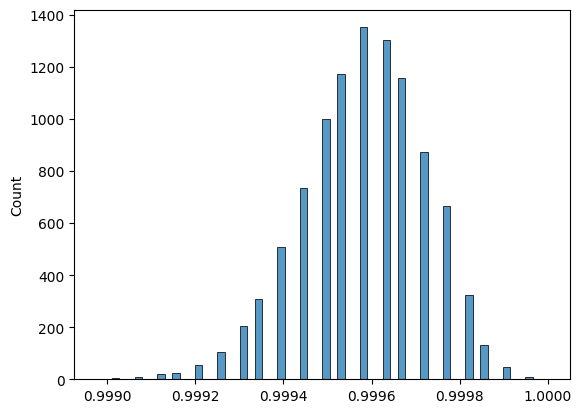

In [8]:
sns.histplot(means_pfizer)

# Przedział ufności Moderna

In [9]:
n_samples = 15000
means_moderna = []
n_boot = 10000
for i in range(1, n_boot):
    boot = sklearn.utils.resample(pfizer, replace=True, n_samples=n_samples)
    means_moderna.append(np.mean(boot))

means_moderna.sort()
print('Przedział ufności moderna: [', means_moderna[250], ':', means_moderna[-250], ']')

Przedział ufności moderna: [ 0.9992 : 0.9998666666666667 ]


<Axes: ylabel='Count'>

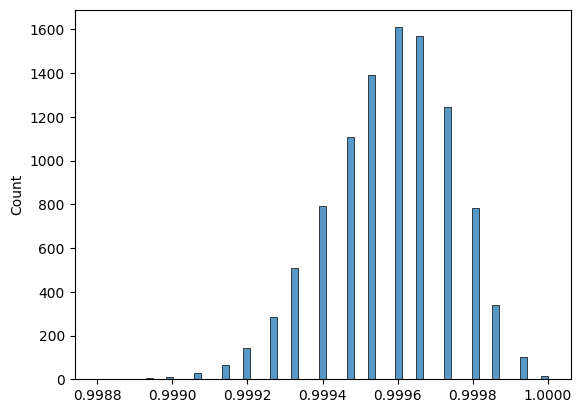

In [10]:
sns.histplot(means_moderna)

# Test permutacyjny

In [11]:
def statistic(x, y, axis=0):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

p_value = permutation_test((pfizer, moderna), statistic,
                           alternative='two-sided')

### pvalue jest na poziomie 91%, z tego powodu nie jesteśmy w stanie idrzucić hipotezy H0 o tożsamości zbiorów, nie jesteśmy na podstawie takich danych określić która szczepionka jest skuteczniejsza, potrzeba określić moc testu aby doweidzieć się ile potrzeba próbek aby porównać zbiory

In [12]:
p_value

PermutationTestResult(statistic=-8.527131782953834e-05, pvalue=0.9084, null_distribution=array([ 2.79069767e-05, -3.11627907e-04, -1.98449612e-04, ...,
        2.79069767e-05,  1.41085271e-04, -1.98449612e-04]))

# Moc testu

In [13]:
effect = (pfizer_mean - moderna_mean) / ((pfizer_std + moderna_std) / 2)
effect

-0.0044056568188018085

In [22]:
analysis = TTestIndPower()
power = analysis.solve_power(effect, power=None, nobs1=len(moderna), ratio=pfizer_mean/moderna_mean, alpha=0.05)
print('Power of test:', power)

Power of test: 0.06683551280252675


# Populacja dla stwierdzenia istotnej różnicy

In [24]:
population = analysis.solve_power(effect, power=0.6, nobs1=None, ratio=pfizer_mean/moderna_mean, alpha=0.05)
print('Population of moderna samples to decide which vaccine is better:', int(population))

Population of moderna samples to decide which vaccine is better: 504774
